Install dependencies

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

Run simulation and save data

In [15]:
import SimCellPack as scp

cellModel = scp.SimCellPack(cellModel="P14", numCells = 3, simCycles = 6, seed = 1, profile = "nycc", balancing = "passive", getSOCsWhen = "all", sampleFactor = 30, utilization = [2,2])

cellModel.startSim()

feedback = [int(cellModel.balancing=="active")]*cellModel.numCells
data = []

code = 1
# Code coding: 0 - simulation waiting, 1 - discharging, 2 - charging, 3 - resting, >= 4 - unassingned
while code > 0:
    code, state = cellModel.getSimStep()
    data.append(state)

    if code > 0:
        cellModel.sendSimFeedback(feedback)

# cellModel.resetSim()

# code = 1
# while code == 1:
#     code, state = cellModel.getSimStep()
#     data.append(state)
#     if code == 1:
#         cellModel.sendSimFeedback(feedback)

cellModel.stopSim()


Plotting

<Axes: >

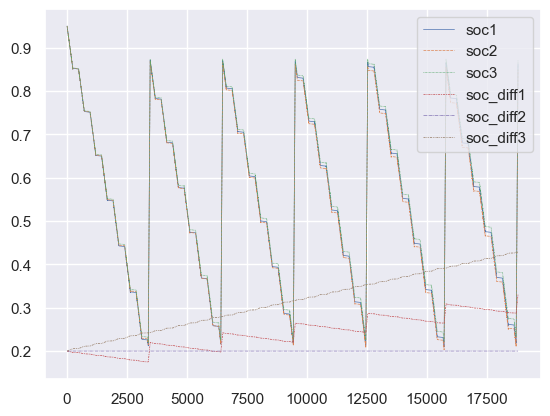

In [16]:
import seaborn as sns
import pandas as pd


d = data[:]

data_dict = {}

minSocIndex = 0
minVal = 1

for i in range(len(d[0])):
    soc = [item[i] for item in d]
    if min(soc) < minVal:
        minVal = min(soc)
        minSocIndex = i
    data_dict['soc'+str(i+1)] = soc

for i in range(len(d[0])):
    socdff = [(item[i]-item[minSocIndex])*10+0.2 for item in d]
    data_dict['soc_diff'+str(i+1)] = socdff


df = pd.DataFrame(data_dict)

sns.set_theme()
sns.lineplot(data=df, linewidth = 0.5)

<Axes: >

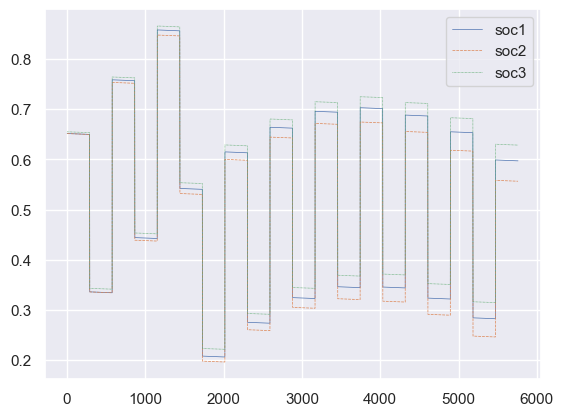

In [4]:
import seaborn as sns
import pandas as pd


d = data[:]

data_dict = {}
for i in range(len(d[0])):
    soc = [item[i] for item in d]
    data_dict['soc'+str(i+1)] = soc


df = pd.DataFrame(data_dict)

sns.set_theme()
sns.lineplot(data=df, linewidth = 0.5)